In [17]:
import pandas as pd

file_path = "C:\\Users\\soswo\\OneDrive\\Desktop\\projects\\solar-challenge-week1\\data\\raw\\Ghana.csv"

# Skip the units row which is row 1
df = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=[1])

# Convert all columns except Timestamp and Comments to numeric (safe conversion)
for col in df.columns:
    if col not in ['Timestamp', 'Comments']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("🔍 Summary Statistics:\n")
print(df.describe())

print("\n🧼 Missing Value Report:\n")
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

print("\n⚠️ Columns with >5% Missing Values:\n")
total_rows = len(df)
null_ratio = (missing_counts / total_rows) * 100
high_null_columns = null_ratio[null_ratio > 5]
print(high_null_columns)


🔍 Summary Statistics:

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      192.653671     103.780215     114.881342     180.719437   
std       291.737603     211.861123     160.324896     271.108128   
min       -13.500000     -13.200000     -12.800000       0.000000   
25%        -3.900000      -0.300000      -2.900000       0.000000   
50%         0.100000       0.000000       0.600000       3.300000   
75%       324.900000      40.900000     222.200000     294.700000   
max      1446.000000     959.000000     826.000000    1329.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      183.852261      25.957242      78.595522       1.612004   
std       276.097498       3.495390      17.346300       1.030162   
min         0.000000      16.500000      10.100000       0.000000   
25%       

In [19]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

file_path = "C:\\Users\\soswo\\OneDrive\\Desktop\\projects\\solar-challenge-week1\\data\\raw\\Ghana.csv"

# Skip the units row which is row 1
df = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=[1])


# Columns to process
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and filter outliers
z_scores = df[key_columns].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Log number of outliers removed
print(f'Removing {outliers.sum()} outlier rows.')

# Drop outliers
df_cleaned = df[~outliers].copy()

# Handle missing values: impute with median
df_cleaned[key_columns] = df_cleaned[key_columns].fillna(df_cleaned[key_columns].median())

# Save to cleaned file
country = 'Ghana'  # Replace with your country name
output_path = f'C:\\Users\\soswo\\OneDrive\\Desktop\\projects\\solar-challenge-week1\\data\\processed\\{country}_clean.csv'
os.makedirs('data\\processed', exist_ok=True)
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")


Removing 18250 outlier rows.
Cleaned data saved to: C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv


C:\Users\soswo\AppData\Local\Temp\ipykernel_26488\912876272.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


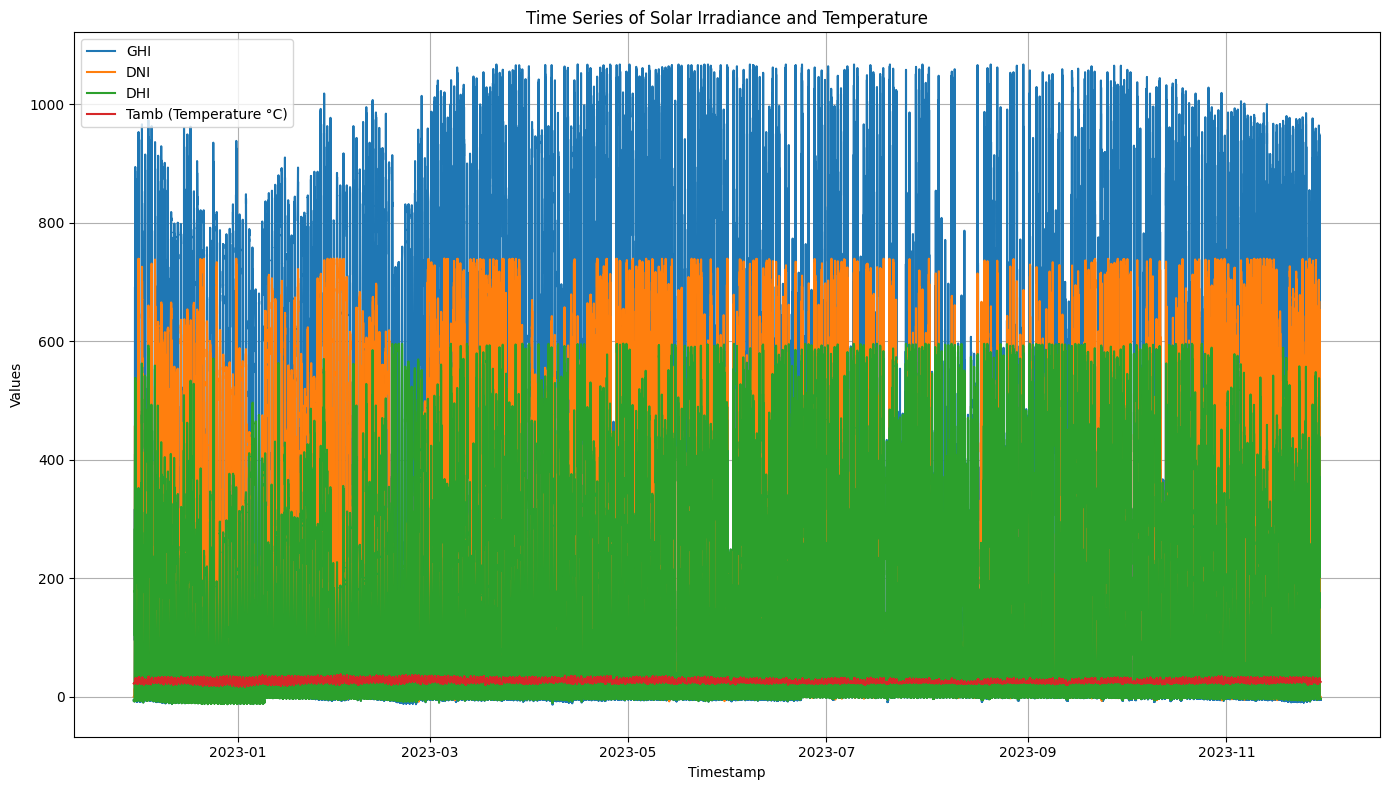

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (adjust the path)
file_path = r"C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop the first row if it contains units or headers (your dataset has that)
df = df.iloc[1:].copy()

# Convert columns to correct data types
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plotting
plt.figure(figsize=(14, 8))

plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (Temperature °C)')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of Solar Irradiance and Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                ModA        ModB
Cleaning                        
0         159.640347  162.114955
1         411.723629  422.513989


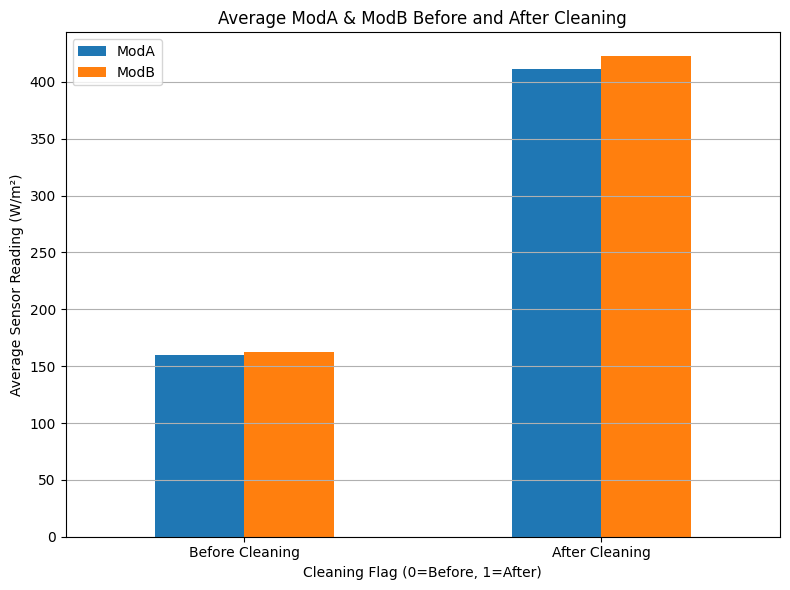

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data (adjust path as needed)
file_path = r"C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop the first row if it contains units or headers
df = df.iloc[1:].copy()

# Convert relevant columns to numeric
for col in ['ModA', 'ModB', 'Cleaning']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by Cleaning flag and compute average ModA and ModB
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

print(grouped)

# Plot
grouped.plot(kind='bar', figsize=(8,6))
plt.title('Average ModA & ModB Before and After Cleaning')
plt.xlabel('Cleaning Flag (0=Before, 1=After)')
plt.ylabel('Average Sensor Reading (W/m²)')
plt.xticks(ticks=[0,1], labels=['Before Cleaning', 'After Cleaning'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


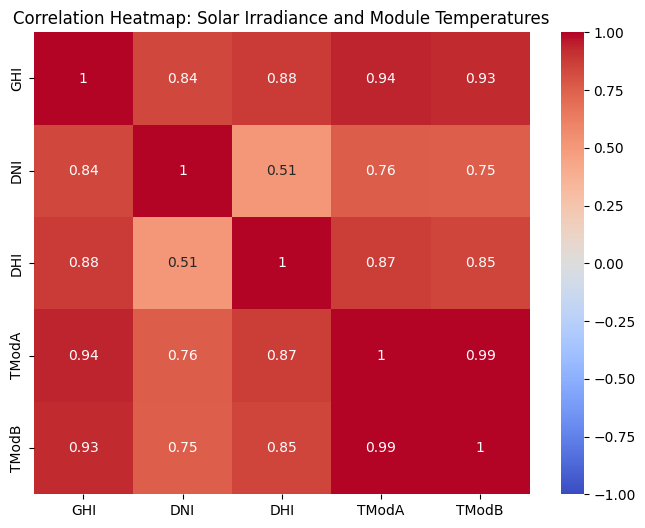

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Solar Irradiance and Module Temperatures')
plt.show()


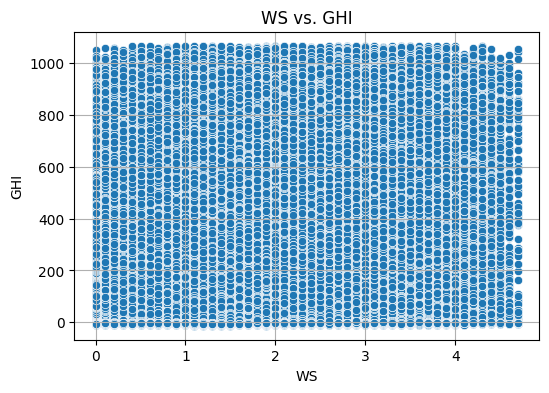

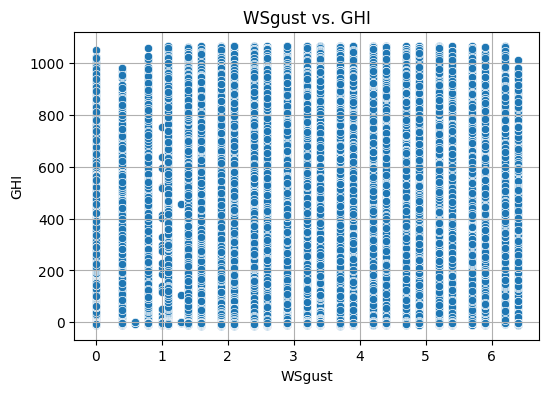

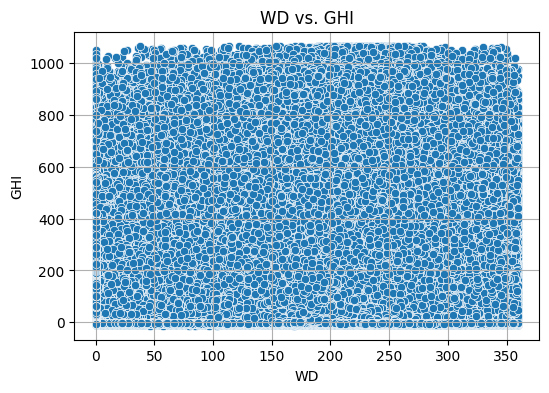

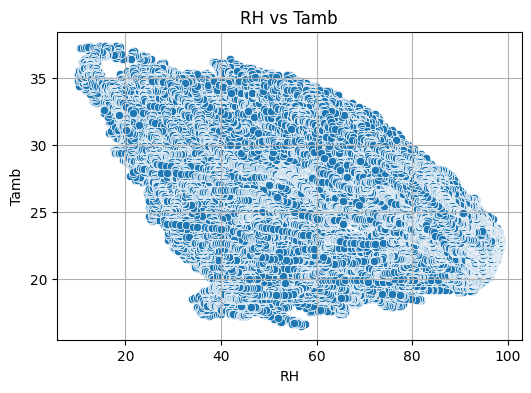

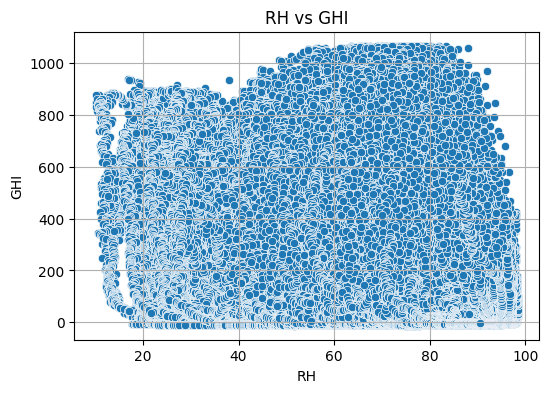

In [27]:
# WS, WSgust, WD vs GHI
for col in ['WS', 'WSgust', 'WD']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='GHI')
    plt.title(f'{col} vs. GHI')
    plt.grid(True)
    plt.show()

# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('RH vs Tamb')
plt.grid(True)
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title('RH vs GHI')
plt.grid(True)
plt.show()


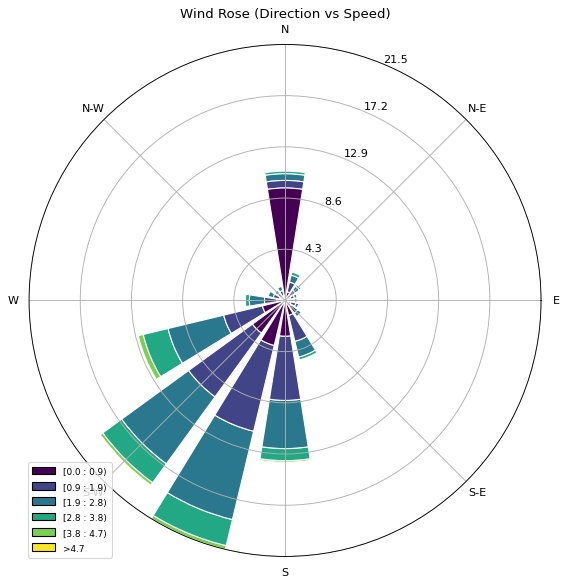

In [28]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
file_path = r"C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.iloc[1:].copy()

# Convert columns to numeric
for col in ['WS', 'WD']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['WS', 'WD'])

# Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose (Direction vs Speed)")
ax.set_legend()
plt.show()


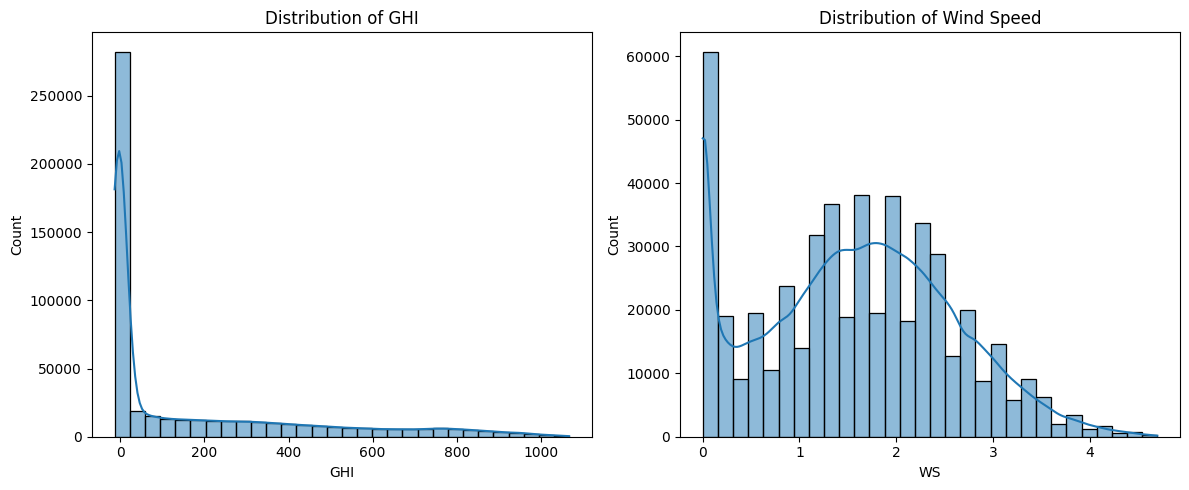

In [29]:
import seaborn as sns

# Ensure 'GHI' and 'WS' are numeric
for col in ['GHI', 'WS']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['GHI', 'WS'])

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title('Distribution of GHI')

plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True)
plt.title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()


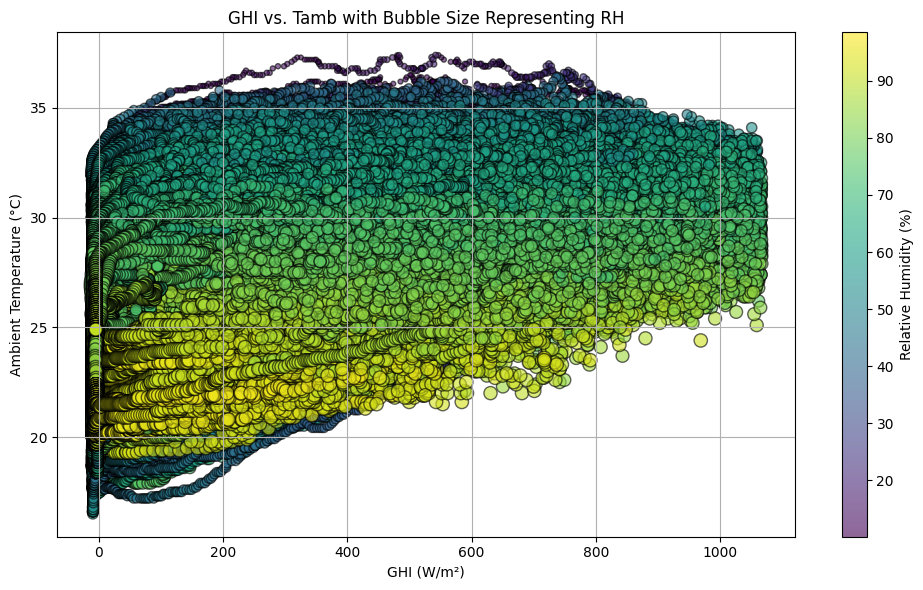

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data
file_path = r"C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.iloc[1:].copy()

# Convert columns to numeric
for col in ['GHI', 'Tamb', 'RH', 'BP']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['GHI', 'Tamb', 'RH'])

# Plot: GHI vs. Tamb with bubble size = RH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['GHI'],
    df['Tamb'],
    s=df['RH'],  # Bubble size based on RH
    c=df['RH'],  # Optional: color bubbles by RH for better scale visualization
    cmap='viridis',
    alpha=0.6,
    edgecolor='k'
)
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.title('GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


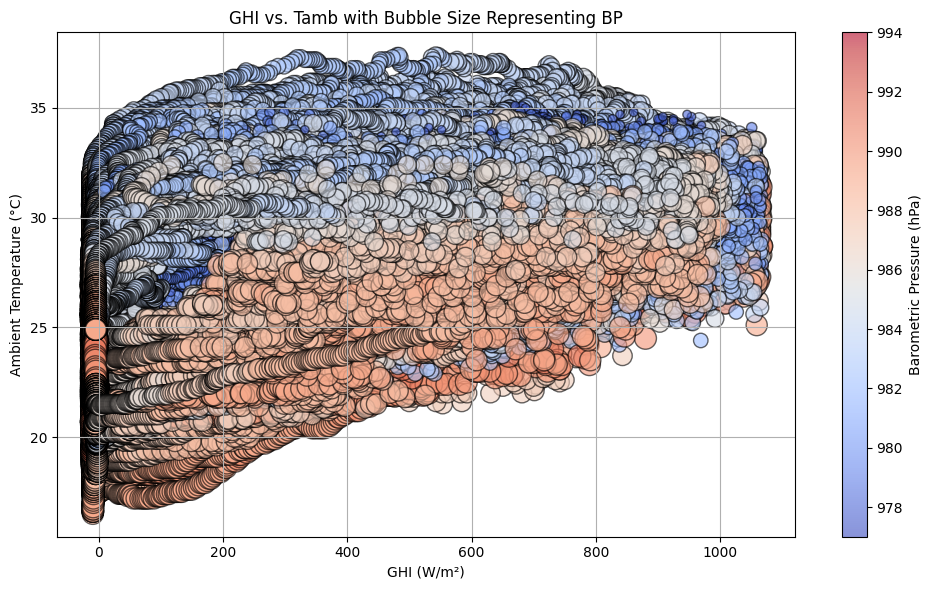

In [31]:
# Ensure BP is numeric and drop NaNs
df = df.dropna(subset=['GHI', 'Tamb', 'BP'])

# Plot with bubble size = BP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['GHI'],
    df['Tamb'],
    s=(df['BP'] - df['BP'].min()) / (df['BP'].max() - df['BP'].min()) * 300 + 20,  # Normalize size
    c=df['BP'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolor='k'
)
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.title('GHI vs. Tamb with Bubble Size Representing BP')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()
